## Earthquake Data
Import the earthquake data directly from the following URL (it is a csv file). Store it in a variable raw_eqk.

Do some simple preliminary exploration of the raw_eqk dataframe.
## Data Selection
Check which are the unique values for the type of earthquakes.
Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 6.5.
Store this as a new dataframe called eqk.

Overwrite eqk dataframe as a geopandas.GeoDataFrame. HINT: find the CRS of the dataset by looking at the metadata.
Make a simple plot of the eqk data.
## Maps
Create a map of the earthquales of magnitude greater equal to 6.5 across the world in 2014. Color the points by the magnitude. This is an example of how it could look like:

In [1]:
#Import Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

In [4]:
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [5]:
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [8]:
eqk1 = raw_eqk[raw_eqk['type'] == 'earthquake']

In [9]:
eqk2 = eqk1[eqk1['mag']>6.5]

In [10]:
eqk = gpd.GeoDataFrame(eqk2, # data
                                    # specify geometry column
                                    geometry=gpd.points_from_xy(eqk2.longitude, 
                                             eqk2.latitude),
                                    # specify CRS
                                    crs='EPSG:4326'
                    )

<AxesSubplot:>

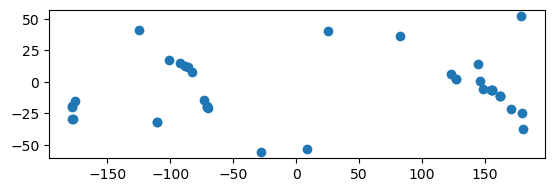

In [12]:
eqk.plot()

In [13]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

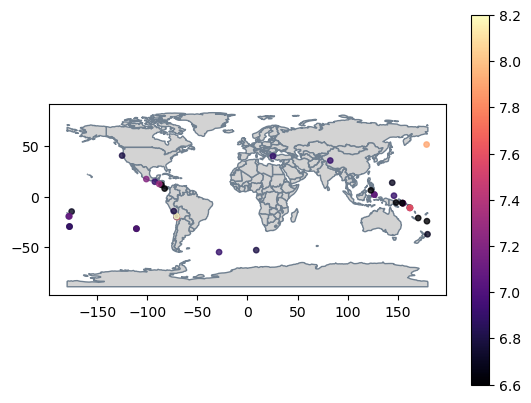

In [21]:
fig, ax = plt.subplots()

worldmap.plot(ax=ax,
            color='lightgrey',
            edgecolor = 'slategray')

ax.set_title('Earthquales of Magnitude > or equal 10 6.5',
fontsize=20)

eqk.plot(ax=ax, 
                  column='mag', # color points according to primsource value
                  legend=True,    # add legend
                  markersize = 15, # adjust point size
                  cmap='magma', # this color map has 20 different colors
                  alpha=0.8)